<a href="https://colab.research.google.com/github/albertotrunk/depth2video/blob/main/01_img2depth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisites


In [1]:
#todo
#ffmpeg -start_number 0 -i input.%03d.png -c:v libx264 -r 24 -pix_fmt yuv420p output.mp4
#ffmpeg -i output.mp4 -filter:v "minterpolate=mi_mode=2" output.mp4 
#ffmpeg -i <input> -filter:v fps=30 <output>
#sampledata
#color.mp4
#depth

#GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)


#memory
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Tue Dec 13 04:16:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    26W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#%pip install ..

%pip install -U git+https://github.com/huggingface/transformers.git
%pip install -U git+https://github.com/huggingface/diffusers.git accelerate ftfy scipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-mk4e0o26
  Running command git clone -q https://github.com/huggingface/transformers.git /tmp/pip-req-build-mk4e0o26
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 7.6 MB 15.3 MB/s 
     |████████████████████████████████| 182 kB 86.3 MB/s 
  Created wheel for transformers: filename=transformers-4.26.0.dev0-py3-none-any.whl size=5961994 sha256=c09c38f5602b9b1dc975c177b613bbca63dce42bf6163e07d3ba5fa17586c53a
  Stored in directory: /tmp/pip-ephem-wheel-cache-fm7y4n09/wheels/05/0a/97/64ae47c27ba95fae2cb5838e7b4b7247a34d4a8ba5f7092de2
Successfully built transformers
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/hugging

# Basic img2depth
Main example img2depth

In [ ]:
import torch
from diffusers import StableDiffusionDepth2ImgPipeline

pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
   "stabilityai/stable-diffusion-2-depth",
   torch_dtype=torch.float16,
).to("cuda")

  0%|          | 0/10 [00:00<?, ?it/s]

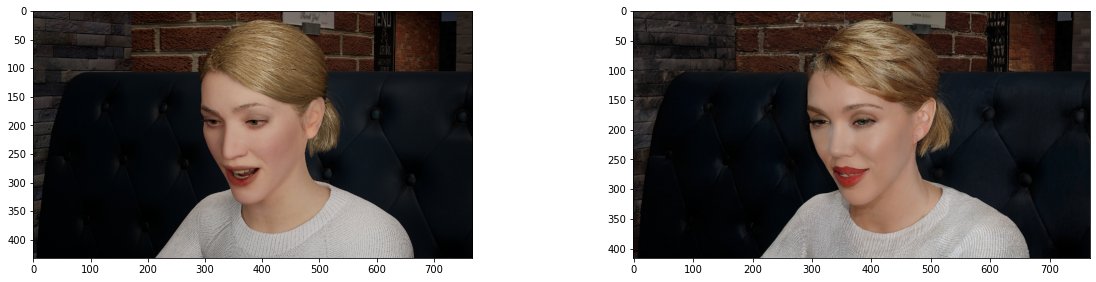

In [30]:
import requests
from PIL import Image
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

url = "https://raw.githubusercontent.com/albertotrunk/depth2video/main/example/color_768.jpg" #@param {type:"string"}
init_image = Image.open(requests.get(url, stream=True).raw)
init_image

prompt = "a photo of Scarlett Johansson with a short haircut, hyper resolution 10k" #@param {type:"string"}
negative_prompt = "border, frame, lowres, jpeg artifacts, low quality, normal quality, worst quality, poorly drawn, error. abstract, asymmetrical, blurry, cropped, disconnected, duplicate, extra, missing, signature, text, username, watermark. amputee, bad anatomy, deformed, disfigured, disproportionate, eye bags, fused, malformed, morbid, mutated, mutation, mutilated, hands, fingers,bad hand,extra limbs,missing limb,extra leg,missing leg,missing hand,extra hand"  #@param {type:"string"}

strength = 0.2  #@param {type:"number"}

images = pipe(prompt=prompt, image=init_image, negative_prompt=n_propmt, strength=strength)
image = images.images[0]
image


%matplotlib inline

images = [init_image,image]


plt.figure(figsize=(20,10))
columns = 2
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)


